In [23]:
import os
import random

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import itertools

### Installing Dependencies...

In [2]:
import tensorflow
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,Adadelta,RMSprop,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
import argparse
import cv2
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
import scipy
import skimage
from skimage.transform import resize
import random
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,Adadelta,RMSprop,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
import argparse
import cv2
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
import scipy
import skimage
from skimage.transform import resize
import random
import os
#
import shutil

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import shutil
from sklearn.utils import shuffle
import keras
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split

## Dataset Input

* GDrive Link
* Copy dataset
* Extract dataset

In [6]:
#____Gdrive Link_____________________________
from google.colab import drive
drive.mount('/content/gdrive')
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive


ModuleNotFoundError: No module named 'google.colab'

### Dataset: Data short


*   *Data Short*
   * test
   * train
   * val



In [ ]:
# copy the Data_Short.zip file into the root directory of cloud VM
%cd /content
!cp '/content/gdrive/MyDrive/OCT/Data/Data_Short.zip' /content
# unzip the zip file and its contents should now be in /content/data
!unzip '/content/Data_Short.zip' -d data/;

### Dataset: OCT2017 (Full)


*   *OCT2017*
   * test
   * train
   * val



In [ ]:
# copy the OCT2017.zip file into the root directory of cloud VM
%cd /content
#!cp '/content/gdrive/MyDrive/OCT/Data/OCT2017.zip' /content
# unzip the zip file and its contents should now be in /content/data
!unzip '/content/gdrive/MyDrive/OCT/Data/OCT2017.zip' -d data/;

## Dataset Pre - Processing

1. Store All Train, Test, Val images to >>> '*all_images*' folder
---

In [5]:
# Copy all images from train directory
des_dir = r'C:\Users\HSSL107\Desktop\Retina OCT\Data\all_images'   # all_images directory
dir_train = r'C:\Users\HSSL107\Desktop\Retina OCT\Data\all_images_\train' 
os.mkdir(des_dir)                 # making all_image directory
 # images to copy from the directory
# Total no of images copied 'count'
count = 0                         # initializing count
for root, dir, filename in os.walk(dir_train):
    print(filename)
    for files in filename:
        path = os.path.join(root,files)
        shutil.copy(path,des_dir)
        count = count + 1
print(count)
# Make a zip file to store it for not processing further
#shutil.make_archive("all_images", "zip", "all_images")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\HSSL107\\Desktop\\Retina OCT\\Data\\all_images'

In [4]:
des_dir = r'C:\Users\HSSL107\Desktop\Retina OCT\Data\all_images'   # all_images directory
dir_train = r'C:\Users\HSSL107\Desktop\Retina OCT\Data\all_images_\train' 

2. Storing the names of each image in '*filename*' & associated labels in '*label*' array

---



In [5]:
root, dir, filenames = os.walk(r'C:\Users\HSSL107\Desktop\Retina OCT\Data\all_images').__next__()
m = len(filenames)
#m = count
print(m)

filenames = []
labels = np.zeros((m,1))

images_dir = r'C:\Users\HSSL107\Desktop\Retina OCT\Data\all_images' 
filenames_count = 0
labels_count = -1

for root, dir, files in os.walk(dir_train):
    print(files)
    for fil in files:
        filenames.append(fil)
        labels[filenames_count,0] = labels_count
        filenames_count = filenames_count + 1
    labels_count = labels_count + 1  
print(len(filenames))
print(labels.shape)

83484
[]
['CNV-1016042-1.jpeg', 'CNV-1016042-10.jpeg', 'CNV-1016042-100.jpeg', 'CNV-1016042-101.jpeg', 'CNV-1016042-102.jpeg', 'CNV-1016042-103.jpeg', 'CNV-1016042-104.jpeg', 'CNV-1016042-105.jpeg', 'CNV-1016042-106.jpeg', 'CNV-1016042-107.jpeg', 'CNV-1016042-108.jpeg', 'CNV-1016042-109.jpeg', 'CNV-1016042-11.jpeg', 'CNV-1016042-110.jpeg', 'CNV-1016042-111.jpeg', 'CNV-1016042-112.jpeg', 'CNV-1016042-113.jpeg', 'CNV-1016042-114.jpeg', 'CNV-1016042-115.jpeg', 'CNV-1016042-116.jpeg', 'CNV-1016042-117.jpeg', 'CNV-1016042-118.jpeg', 'CNV-1016042-119.jpeg', 'CNV-1016042-12.jpeg', 'CNV-1016042-120.jpeg', 'CNV-1016042-121.jpeg', 'CNV-1016042-122.jpeg', 'CNV-1016042-123.jpeg', 'CNV-1016042-124.jpeg', 'CNV-1016042-125.jpeg', 'CNV-1016042-126.jpeg', 'CNV-1016042-127.jpeg', 'CNV-1016042-128.jpeg', 'CNV-1016042-129.jpeg', 'CNV-1016042-13.jpeg', 'CNV-1016042-130.jpeg', 'CNV-1016042-131.jpeg', 'CNV-1016042-132.jpeg', 'CNV-1016042-133.jpeg', 'CNV-1016042-134.jpeg', 'CNV-1016042-135.jpeg', 'CNV-1016042

['DME-1072015-1.jpeg', 'DME-1072015-2.jpeg', 'DME-1072015-3.jpeg', 'DME-1072015-4.jpeg', 'DME-1072015-5.jpeg', 'DME-1072015-6.jpeg', 'DME-1072015-7.jpeg', 'DME-1083927-1.jpeg', 'DME-1083927-10.jpeg', 'DME-1083927-11.jpeg', 'DME-1083927-12.jpeg', 'DME-1083927-2.jpeg', 'DME-1083927-3.jpeg', 'DME-1083927-4.jpeg', 'DME-1083927-5.jpeg', 'DME-1083927-6.jpeg', 'DME-1083927-7.jpeg', 'DME-1083927-8.jpeg', 'DME-1083927-9.jpeg', 'DME-1141111-1.jpeg', 'DME-1141111-2.jpeg', 'DME-1141111-3.jpeg', 'DME-1141111-4.jpeg', 'DME-1141111-5.jpeg', 'DME-1163718-1.jpeg', 'DME-1163718-2.jpeg', 'DME-1163718-3.jpeg', 'DME-1163718-4.jpeg', 'DME-1163718-5.jpeg', 'DME-1163718-6.jpeg', 'DME-1163718-7.jpeg', 'DME-1163718-8.jpeg', 'DME-1163718-9.jpeg', 'DME-1169820-1.jpeg', 'DME-1169820-2.jpeg', 'DME-1169820-3.jpeg', 'DME-1169820-4.jpeg', 'DME-119840-1.jpeg', 'DME-119840-10.jpeg', 'DME-119840-11.jpeg', 'DME-119840-12.jpeg', 'DME-119840-13.jpeg', 'DME-119840-14.jpeg', 'DME-119840-15.jpeg', 'DME-119840-16.jpeg', 'DME-11

['DRUSEN-1001666-1.jpeg', 'DRUSEN-1001666-2.jpeg', 'DRUSEN-1001666-3.jpeg', 'DRUSEN-1001666-4.jpeg', 'DRUSEN-1001666-5.jpeg', 'DRUSEN-1001666-6.jpeg', 'DRUSEN-1001666-7.jpeg', 'DRUSEN-1001666-8.jpeg', 'DRUSEN-1001666-9.jpeg', 'DRUSEN-1001772-1.jpeg', 'DRUSEN-1001772-2.jpeg', 'DRUSEN-100580-1.jpeg', 'DRUSEN-1016042-1.jpeg', 'DRUSEN-1016042-2.jpeg', 'DRUSEN-1016042-3.jpeg', 'DRUSEN-1016042-4.jpeg', 'DRUSEN-1016042-5.jpeg', 'DRUSEN-1016042-6.jpeg', 'DRUSEN-1016042-7.jpeg', 'DRUSEN-1020679-1.jpeg', 'DRUSEN-1020679-2.jpeg', 'DRUSEN-1020679-3.jpeg', 'DRUSEN-1020679-4.jpeg', 'DRUSEN-1020679-5.jpeg', 'DRUSEN-1021530-1.jpeg', 'DRUSEN-1021530-2.jpeg', 'DRUSEN-103885-1.jpeg', 'DRUSEN-103885-2.jpeg', 'DRUSEN-103885-3.jpeg', 'DRUSEN-103885-4.jpeg', 'DRUSEN-103885-5.jpeg', 'DRUSEN-1042462-1.jpeg', 'DRUSEN-1046294-1.jpeg', 'DRUSEN-1046294-2.jpeg', 'DRUSEN-1046294-3.jpeg', 'DRUSEN-1046294-4.jpeg', 'DRUSEN-1046294-5.jpeg', 'DRUSEN-1047803-1.jpeg', 'DRUSEN-1047803-2.jpeg', 'DRUSEN-1047803-3.jpeg', 'DRUS

['NORMAL-1001666-1.jpeg', 'NORMAL-1001772-1.jpeg', 'NORMAL-1001772-2.jpeg', 'NORMAL-1001772-3.jpeg', 'NORMAL-1001772-4.jpeg', 'NORMAL-1001772-5.jpeg', 'NORMAL-1001772-6.jpeg', 'NORMAL-1001772-7.jpeg', 'NORMAL-1001772-8.jpeg', 'NORMAL-1004480-1.jpeg', 'NORMAL-1004480-10.jpeg', 'NORMAL-1004480-11.jpeg', 'NORMAL-1004480-12.jpeg', 'NORMAL-1004480-13.jpeg', 'NORMAL-1004480-14.jpeg', 'NORMAL-1004480-2.jpeg', 'NORMAL-1004480-3.jpeg', 'NORMAL-1004480-4.jpeg', 'NORMAL-1004480-5.jpeg', 'NORMAL-1004480-6.jpeg', 'NORMAL-1004480-7.jpeg', 'NORMAL-1004480-8.jpeg', 'NORMAL-1004480-9.jpeg', 'NORMAL-100580-1.jpeg', 'NORMAL-100580-2.jpeg', 'NORMAL-100580-3.jpeg', 'NORMAL-100580-4.jpeg', 'NORMAL-100580-5.jpeg', 'NORMAL-100580-6.jpeg', 'NORMAL-100580-7.jpeg', 'NORMAL-1007507-1.jpeg', 'NORMAL-1007507-2.jpeg', 'NORMAL-1014193-1.jpeg', 'NORMAL-1014193-2.jpeg', 'NORMAL-1014193-3.jpeg', 'NORMAL-1014193-4.jpeg', 'NORMAL-1014715-1.jpeg', 'NORMAL-1014715-10.jpeg', 'NORMAL-1014715-11.jpeg', 'NORMAL-1014715-2.jpeg',

3. Converting to numpy array
---

In [6]:
np.save('filenames.npy',filenames) 
y_encode = to_categorical(labels) # One hot encoding to labels
np.save('y_encode.npy',y_encode) 

4. Shuffle the names
---

In [7]:
filenames_sfl,y_encode_sfl = shuffle(filenames,y_encode)
np.save('filenames_sfl.npy',filenames_sfl)
np.save('y_encode_sfl.npy',y_encode_sfl) 

5.  Split Dataset
---

In [8]:
filenames_sfl = np.array(filenames_sfl)
x_train, x_val, y_train, y_val = train_test_split (filenames_sfl, y_encode_sfl, test_size = 0.2, random_state = 1)
x_train, x_test, y_train, y_test = train_test_split (x_train, y_train, test_size = 0.25, random_state = 1)


print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

np.save('x_train.npy',x_train)
np.save('y_train.npy',y_train)

np.save('x_val.npy',x_val)
np.save('y_val.npy',y_val)

np.save('x_test.npy',x_test)
np.save('y_test.npy',y_test)

(50090,)
(50090, 4)
(16697,)
(16697, 4)
(16697,)
(16697, 4)


## Custom Generator

In [9]:
from keras import utils as np_utils

In [10]:
class My_Custom_Generator(keras.utils.all_utils.Sequence) :

    def __init__(self, image_filenames, labels, batch_size) :
        self.image_filenames = image_filenames
        self.labels = labels
        self.batch_size = batch_size


    def __len__(self) :
        return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)


    def __getitem__(self, idx) :
        batch_x = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
        batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]

        return np.array([
                #resize(imread('/content/gdrive/MyDrive/OCT/Data/all_images/' + str(file_name)), (224, 224, 3))
                cv2.resize(cv2.imread(os.path.join(des_dir, file_name)), (224, 224))
                   for file_name in batch_x])/255.0, np.array(batch_y)

In [46]:
class My_Custom_Generator(keras.utils.all_utils.Sequence) :
      
    def __init__(self, image_filenames, labels, batch_size) :
        self.image_filenames = image_filenames
        self.labels = labels
        self.batch_size = batch_size
    
    
    def __len__(self) :
        return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)
  
  
    def __getitem__(self, idx) :
        batch_x = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
        batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
    
        return np.array([
                #resize(imread('/content/gdrive/MyDrive/OCT/Data/all_images/' + str(file_name)), (224, 224, 3))
                #np.flipr(cv2.resize(cv2.imread('/content/all_images/'+file_name), (224, 224)))
                tf.keras.preprocessing.image.random_rotation(resize(imread(os.path.join(des_dir, str(file_name)) ), (224, 224, 3)), rg=15, row_axis=1, col_axis=2, channel_axis=0, fill_mode='nearest', interpolation_order=1)
                   for file_name in batch_x])/255.0, np.array(batch_y)

In [30]:
# Custom generator 
batch_size = 64

my_training_batch_generator = My_Custom_Generator(x_train, y_train, batch_size)
my_validation_batch_generator = My_Custom_Generator(x_val, y_val, batch_size)


In [21]:
# Augmentation for rotational in Normal train
trainAug  = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

### Model
---

In [12]:
import tensorflow as tf  from tensorflow.keras.applications.resnet_v2 import ResNet152V2

In [53]:
resnet152 = tf.keras.applications.resnet.ResNet152(
    include_top = False, 
    weights = 'imagenet', 
    input_tensor = None,
    input_shape = (224,224,3), 
    pooling = None, 
    classes = 4
)
resnet152.trainable = False
# locking initial layer weights of the imported models

In [ ]:
vgg19 = tf.keras.applications.VGG19(
    include_top = False, 
    weights = 'imagenet', 
    input_tensor = None,
    input_shape = (224,224,3), 
    pooling = None, 
    classes = 4
)
vgg19.trainable = False
# locking initial layer weights of the imported models

In [ ]:
!pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 10.9 MB/s 


In [54]:
import tensorflow_addons as tfa
model_resnet152 = tf.keras.models.Sequential([
    resnet152,
    tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = 'same'),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),# modifying final layers of VGG-19
    tf.keras.layers.Conv2D(64, kernel_size = (3, 3), padding = 'same'),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])


EPOCHS = 50
BS = 16
metrics = ['accuracy',
                tf.keras.metrics.AUC(),
                tfa.metrics.CohenKappa(num_classes = 4),
                tfa.metrics.F1Score(num_classes = 4),
                tf.keras.metrics.Precision(), 
                tf.keras.metrics.Recall()]

# compile our model
print("[INFO] compiling model...")
opt = "adam"
model_resnet152.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
callbacks = [ModelCheckpoint('retinal_oct.hdf5', monitor='val_loss', save_best_only=True),
             EarlyStopping(monitor='val_loss', patience=5)]
model_resnet152.summary()

[INFO] compiling model...
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 7, 7, 2048)        58370944  
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 128)         2359424   
_________________________________________________________________
p_re_lu_3 (PReLU)            (None, 7, 7, 128)         6272      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)          73792     
_________________________________________________________________
p_re_lu_4 (PReLU)            (None, 7, 7, 64)          3136      
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)             

In [ ]:
import tensorflow_addons as tfa
model_vgg19 = tf.keras.models.Sequential([
    vgg19,
    tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = 'same'),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),# modifying final layers of VGG-19
    tf.keras.layers.Conv2D(64, kernel_size = (3, 3), padding = 'same'),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])


EPOCHS = 50
BS = 16
metrics = ['accuracy',
                tf.keras.metrics.AUC(),
                tfa.metrics.CohenKappa(num_classes = 4),
                tfa.metrics.F1Score(num_classes = 4),
                tf.keras.metrics.Precision(), 
                tf.keras.metrics.Recall()]

# compile our model
print("[INFO] compiling model...")
opt = "adam"
model_vgg19.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
callbacks = [ModelCheckpoint('retinal_oct.hdf5', monitor='val_loss', save_best_only=True),
             EarlyStopping(monitor='val_loss', patience=5)]
model_vgg19.summary()

In [31]:
import tensorflow as tf
import tensorflow_addons as tfa
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(64, (5,5), input_shape=(224,224,3), strides=(2,2), padding="valid", activation = "relu"))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid")) # Max Pooling 1
model.add(Conv2D(32, (1,1), strides=(1,1), padding="same", activation = "relu"))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid")) # Max Pooling 1

# 2nd Convolutional Layer
model.add(Conv2D(128, (1,1), strides=(1,1), padding="same", activation = "relu"))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid")) # Max Pooling 1

# 3rd Convolutional Layer
model.add(Conv2D(128, (3,3), strides=(1,1), padding="same", activation = "relu"))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid")) # Max Pooling 2
model.add(Dropout(0.4))

model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid")) # Max Pooling 3

# 1st Fully Connected Layer
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5)) #DropOut

# 2nd Fully Connected Layer
model.add(Dense(4, activation = "softmax"))

EPOCHS = 50
BS = 16

earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.2, min_lr=0.0006)

mcp_weight = ModelCheckpoint('RetinalNewModel.hdf5', save_best_only=True, monitor='val_loss', mode='min')

callbacks = [earlystop, learning_rate_reduction, mcp_weight]
metrics = ['accuracy',
                tf.keras.metrics.AUC(),
                tfa.metrics.CohenKappa(num_classes = 4),
                tfa.metrics.F1Score(num_classes = 4),
                tf.keras.metrics.Precision(), 
                tf.keras.metrics.Recall()]

# compile our model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 110, 110, 64)      4864      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 54, 54, 32)        2080      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 128)       4224      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 128)      

In [32]:
history=model.fit(my_training_batch_generator, steps_per_epoch = int(50090 // batch_size), epochs=50, validation_data=my_validation_batch_generator,validation_steps = int(16697 // batch_size), callbacks=callbacks)

Epoch 1/50
782/782 [==============================] - 309s 392ms/step - loss: 0.7452 - accuracy: 0.7185 - val_loss: 0.5313 - val_accuracy: 0.8368
Epoch 2/50
782/782 [==============================] - 239s 306ms/step - loss: 0.4276 - accuracy: 0.8482 - val_loss: 0.3817 - val_accuracy: 0.8827
Epoch 3/50
782/782 [==============================] - 241s 308ms/step - loss: 0.3360 - accuracy: 0.8838 - val_loss: 0.2891 - val_accuracy: 0.9054
Epoch 4/50
782/782 [==============================] - 241s 308ms/step - loss: 0.2930 - accuracy: 0.8988 - val_loss: 0.2628 - val_accuracy: 0.9140
Epoch 5/50
782/782 [==============================] - 246s 314ms/step - loss: 0.2650 - accuracy: 0.9080 - val_loss: 0.2841 - val_accuracy: 0.9126
Epoch 6/50
782/782 [==============================] - 240s 308ms/step - loss: 0.2496 - accuracy: 0.9148 - val_loss: 0.2212 - val_accuracy: 0.9229
Epoch 7/50
782/782 [==============================] - 240s 306ms/step - loss: 0.2308 - accuracy: 0.9197 - val_loss: 0.2455 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


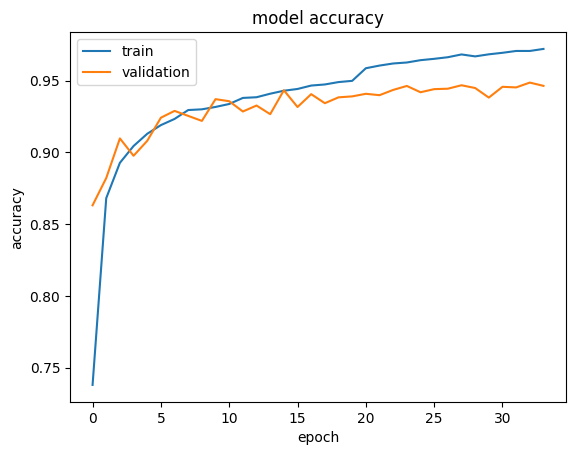

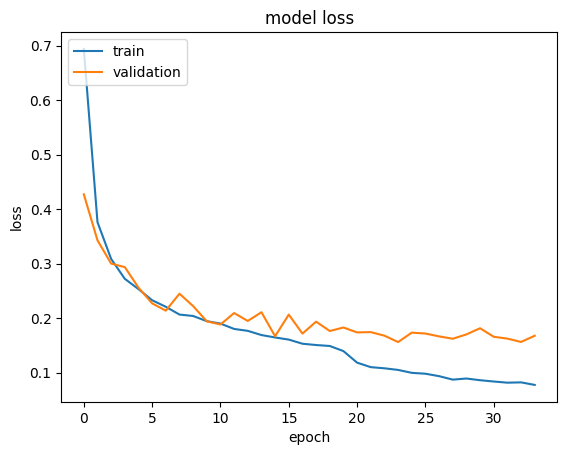

In [40]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Performance Metrics

In [34]:
my_test_batch_generator = My_Custom_Generator(x_test, y_test, batch_size)

In [35]:
predict = model.predict(my_test_batch_generator)

In [73]:
prediction = np.argmax(predict, axis=-1)
print(prediction.shape)
actual = np.argmax(y_test, axis=-1)
print(actual.shape)

(16697,)
(16697,)


In [37]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

accuracy = accuracy_score(prediction, actual)*100
precision = precision_score(prediction, actual, average=None)
f1_score = f1_score(actual, prediction, average=None)
recall = recall_score(actual, prediction, average=None)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('F1_score: ', f1_score)
print('Recall: ', recall)

Accuracy:  94.61579924537342
Precision:  [0.9773774  0.89917427 0.80244755 0.96961117]
F1_score:  [0.96476566 0.91894293 0.84400858 0.96279636]
Recall:  [0.9773774  0.89917427 0.80244755 0.96961117]


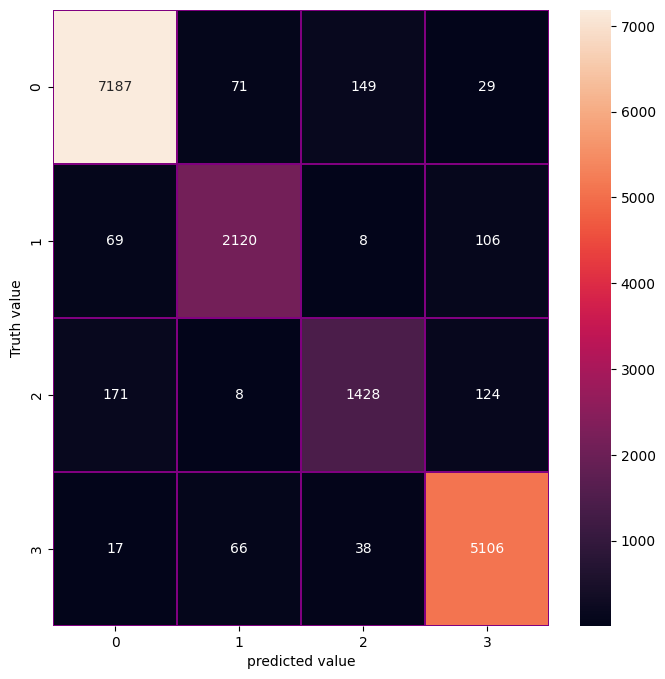

In [45]:
cm = sklearn.metrics.confusion_matrix(actual, prediction)
plt.figure(figsize=(8,8))
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='purple')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()

In [74]:
def replace_label(input_array):

    replaced_array = []
    for i in input_array:
        if input_array[i]==0:
            replaced_array.append('CNV')
        elif input_array[i]==1:
            replaced_array.append('DME')
        elif input_array[i]==2:
            replaced_array.append('Drusen')
        elif input_array[i]==3:
            replaced_array.append('Normal')

    return replaced_array

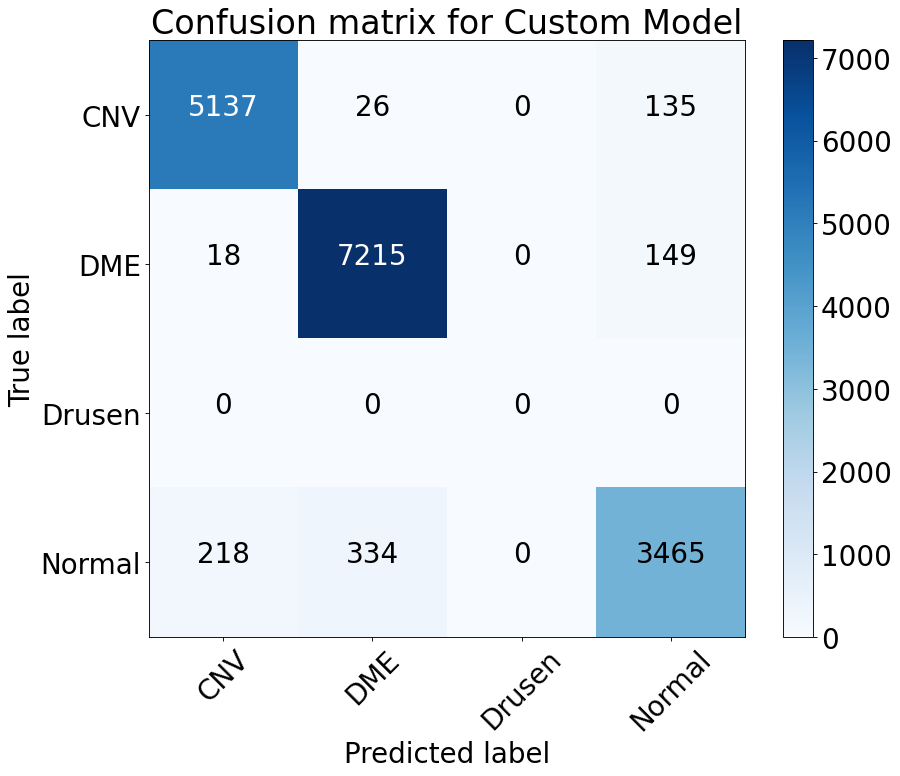

In [75]:
y_true = replace_label(actual)
y_pred = replace_label(prediction)


classes = ['CNV', 'DME', 'Drusen', 'Normal']

cnf_matrix = confusion_matrix(y_true, y_pred, labels=classes)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
   
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 
plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(12, 10), dpi=80)
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix for Custom Model')

In [55]:
history_resnet152=model_resnet152.fit(my_training_batch_generator, steps_per_epoch = int(50090 // batch_size), epochs=50, validation_data=my_validation_batch_generator,validation_steps = int(16697 // batch_size), callbacks=callbacks)

Epoch 1/50
782/782 [==============================] - 497s 623ms/step - loss: 0.9482 - accuracy: 0.6406 - val_loss: 0.8162 - val_accuracy: 0.6960


C:\Users\HSSL107\anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
782/782 [==============================] - 485s 620ms/step - loss: 0.7981 - accuracy: 0.6998 - val_loss: 0.7349 - val_accuracy: 0.7251
Epoch 3/50
782/782 [==============================] - 485s 620ms/step - loss: 0.7352 - accuracy: 0.7250 - val_loss: 0.7550 - val_accuracy: 0.7140
Epoch 4/50
782/782 [==============================] - 482s 616ms/step - loss: 0.6987 - accuracy: 0.7367 - val_loss: 0.7054 - val_accuracy: 0.7361
Epoch 5/50
782/782 [==============================] - 481s 616ms/step - loss: 0.6667 - accuracy: 0.7500 - val_loss: 0.6563 - val_accuracy: 0.7528
Epoch 6/50
782/782 [==============================] - 481s 615ms/step - loss: 0.6357 - accuracy: 0.7632 - val_loss: 0.6226 - val_accuracy: 0.7685
Epoch 7/50
782/782 [==============================] - 482s 616ms/step - loss: 0.6159 - accuracy: 0.7702 - val_loss: 0.6319 - val_accuracy: 0.7626
Epoch 8/50
782/782 [==============================] - 482s 616ms/step - loss: 0.5985 - accuracy: 0.7768 - val_loss: 0.6334 -

KeyboardInterrupt: 

In [15]:
history_vgg19=model_vgg19.fit(my_training_batch_generator, steps_per_epoch = int(50090 // batch_size), epochs=50, validation_data=my_validation_batch_generator,validation_steps = int(16697 // batch_size), callbacks=callbacks)

Epoch 1/50
782/782 [==============================] - 388s 466ms/step - loss: 0.4548 - accuracy: 0.8342 - val_loss: 0.4741 - val_accuracy: 0.8362
Epoch 2/50
782/782 [==============================] - 287s 367ms/step - loss: 0.3095 - accuracy: 0.8905 - val_loss: 0.2804 - val_accuracy: 0.9031
Epoch 3/50
782/782 [==============================] - 286s 365ms/step - loss: 0.2673 - accuracy: 0.9059 - val_loss: 0.2618 - val_accuracy: 0.9079
Epoch 4/50
782/782 [==============================] - 284s 363ms/step - loss: 0.2470 - accuracy: 0.9135 - val_loss: 0.2671 - val_accuracy: 0.9061
Epoch 5/50
782/782 [==============================] - 285s 364ms/step - loss: 0.2286 - accuracy: 0.9198 - val_loss: 0.2452 - val_accuracy: 0.9156
Epoch 6/50
782/782 [==============================] - 285s 364ms/step - loss: 0.2116 - accuracy: 0.9249 - val_loss: 0.2491 - val_accuracy: 0.9157
Epoch 7/50
782/782 [==============================] - 285s 364ms/step - loss: 0.2013 - accuracy: 0.9300 - val_loss: 0.2406 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


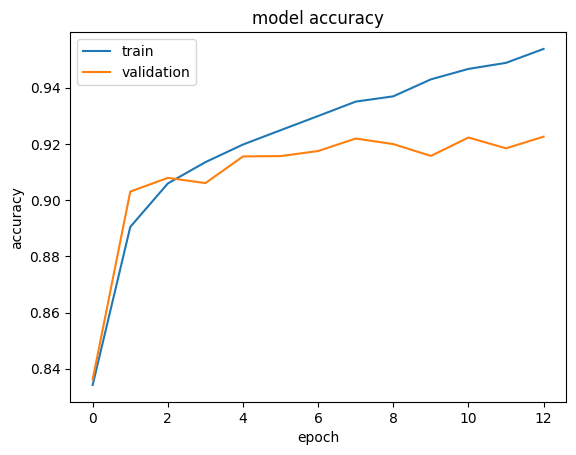

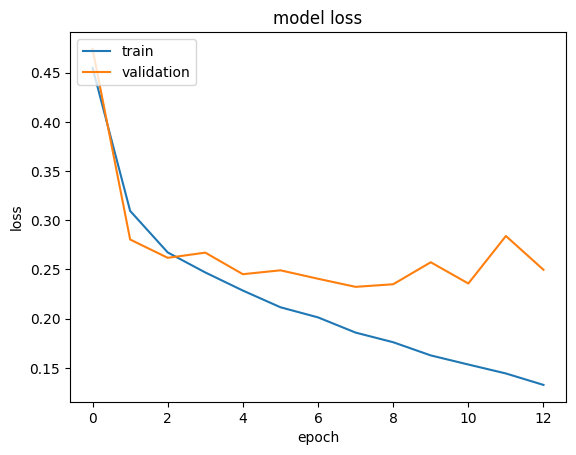

In [48]:
print(history_vgg19.history.keys())
#  "Accuracy"
plt.plot(history_vgg19.history['accuracy'])
plt.plot(history_vgg19.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history_vgg19.history['loss'])
plt.plot(history_vgg19.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [50]:
my_test_batch_generator = My_Custom_Generator(x_test, y_test, batch_size)
predict = model_vgg19.predict(my_test_batch_generator)

prediction = np.argmax(predict, axis=-1)
print(prediction.shape)
actual = np.argmax(y_test, axis=-1)
print(actual.shape)

(16697,)
(16697,)


In [51]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

accuracy = accuracy_score(prediction, actual)*100
precision = precision_score(prediction, actual, average=None)
f1_score = f1_score(actual, prediction, average=None)
recall = recall_score(actual, prediction, average=None)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('F1_score: ', f1_score)
print('Recall: ', recall)

Accuracy:  94.76552674133077
Precision:  [0.97431415 0.90751194 0.84170999 0.96250239]
F1_score:  [0.97202656 0.92682927 0.83880253 0.958012  ]
Recall:  [0.97431415 0.90751194 0.84170999 0.96250239]


### Train
---

In [ ]:
# Model Train (Normal)
BS = 16
print("[INFO] training head...")
'''
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=callbacks)
    '''
history = model.fit(
    my_training_batch_generator,
    steps_per_epoch = (83484/500),
    epochs = 15,
    validation_data = my_validation_batch_generator,
    validation_steps = (32/16),
    max_queue_size=100,
    workers = 4 ,
    callbacks=callbacks,
    use_multiprocessing=True,
    verbose = 1)

[INFO] training head...
Epoch 1/15
166/166 [==============================] - 109s 420ms/step - loss: 1.2469 - accuracy: 0.4371 - val_loss: 1.1078 - val_accuracy: 0.5312
Epoch 2/15
166/166 [==============================] - 178s 1s/step - loss: 1.2466 - accuracy: 0.4394 - val_loss: 1.1040 - val_accuracy: 0.5312
Epoch 3/15
148/166 [=========================>....] - ETA: 20s - loss: 1.2459 - accuracy: 0.4350

In [ ]:
# Model Train batch generator
history = model.fit_generator(generator=my_training_batch_generator,
                   steps_per_epoch = int(3800 // batch_size),
                   epochs = 10,
                   verbose = 1,
                   validation_data = my_validation_batch_generator,
                   validation_steps = int(950 // batch_size))

### Model Performance Check 
---

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


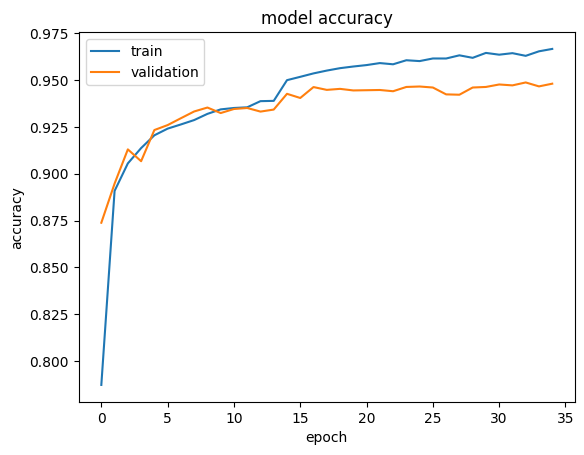

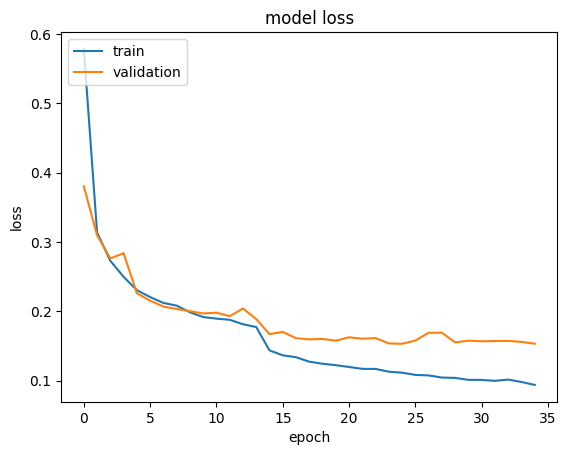

In [44]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Importing dataset 

In [51]:
base_dir = r"C:\Users\HSSL107\Desktop\Retina OCT\Data\all_images_"
print('Base directory --> ', os.listdir(base_dir))

train_dir = r"C:\Users\HSSL107\Desktop\Retina OCT\Data\all_images_\train"
print("Train Directory --> ", os.listdir(train_dir))

validation_dir = r"C:\Users\HSSL107\Desktop\Retina OCT\Data\all_images_\val"
print("Validation Directory --> ", os.listdir(validation_dir))

test_dir = r"C:\Users\HSSL107\Desktop\Retina OCT\Data\all_images_\test"
print("Test Directory --> ", os.listdir(test_dir))

Base directory -->  ['test', 'train', 'val']
Train Directory -->  ['CNV', 'DME', 'DRUSEN', 'NORMAL']
Validation Directory -->  ['CNV', 'DME', 'DRUSEN', 'NORMAL']
Test Directory -->  ['CNV', 'DME', 'DRUSEN', 'NORMAL']


# Defining the models

# Defining transfer learning model VGG-19

In [ ]:
vgg19 = tf.keras.applications.VGG19(
    include_top = False, 
    weights = 'imagenet', 
    input_tensor = None,
    input_shape = (150,150,3), 
    pooling = None, 
    classes = 1000
)
vgg19.trainable = False
# locking initial layer weights of the imported models

model_vgg = tf.keras.models.Sequential([
    
    vgg19,
    tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = 'same'),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),# modifying final layers of VGG-19
    tf.keras.layers.Conv2D(64, kernel_size = (3, 3), padding = 'same'),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint(
    'Rential.hdf5',
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1)

earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=1, restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=5,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.002)

metrics = ['accuracy',
                tf.keras.metrics.AUC(),
                tfa.metrics.CohenKappa(num_classes = 4),
                tfa.metrics.F1Score(num_classes = 4),
                tf.keras.metrics.Precision(), 
                tf.keras.metrics.Recall()]
callbacks = [earlystop, checkpoint, learning_rate_reduction]

In [ ]:
model_vgg.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = metrics)
model_vgg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
conv2d (Conv2D)              (None, 4, 4, 128)         589952    
_________________________________________________________________
p_re_lu (PReLU)              (None, 4, 4, 128)         2048      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 64)          73792     
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 4, 4, 64)          1024      
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               1

# Loading training, validation and test data

In [52]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), class_mode = 'categorical', batch_size = 500)

validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size = (150, 150), class_mode = 'categorical', batch_size = 16)

test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (150, 150), class_mode = 'categorical', batch_size = 16)

Found 83484 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


# Training the models

In [ ]:
history_vgg = model_vgg.fit(
    train_generator,
    steps_per_epoch = (83484/500),
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = (32/16),
    max_queue_size=100,
    workers = 4 ,
    callbacks=callbacks,
    use_multiprocessing=True,
    verbose = 1)

Epoch 1/15
166/166 [==============================] - 337s 2s/step - loss: 0.7637 - accuracy: 0.6953 - auc: 0.8886 - cohen_kappa: 0.5217 - f1_score: 0.5147 - precision: 0.7764 - recall: 0.6113 - val_loss: 0.3488 - val_accuracy: 0.8438 - val_auc: 0.9798 - val_cohen_kappa: 0.7826 - val_f1_score: 0.8122 - val_precision: 0.8667 - val_recall: 0.8125

Epoch 00001: val_loss improved from inf to 0.34875, saving model to Rential.hdf5
Epoch 2/15
166/166 [==============================] - 436s 3s/step - loss: 0.3956 - accuracy: 0.8566 - auc: 0.9718 - cohen_kappa: 0.7823 - f1_score: 0.7727 - precision: 0.8771 - recall: 0.8331 - val_loss: 0.1639 - val_accuracy: 0.9062 - val_auc: 0.9964 - val_cohen_kappa: 0.8680 - val_f1_score: 0.9065 - val_precision: 0.9062 - val_recall: 0.9062

Epoch 00002: val_loss improved from 0.34875 to 0.16391, saving model to Rential.hdf5
Epoch 3/15
166/166 [==============================] - 434s 2s/step - loss: 0.3378 - accuracy: 0.8793 - auc: 0.9790 - cohen_kappa: 0.8178 -

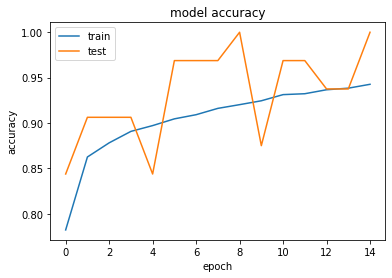

In [ ]:
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

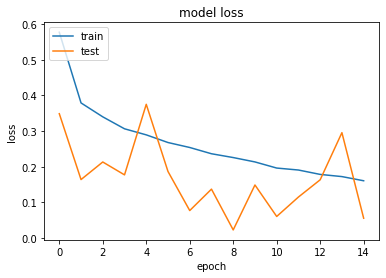

In [ ]:
plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Loss and accuracy vs epochs

Values for VGG-19 based ConvNet


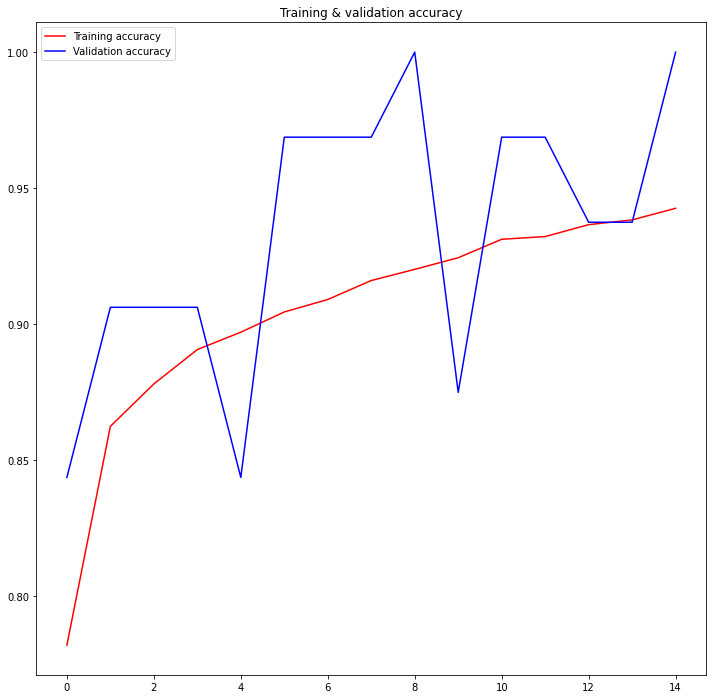

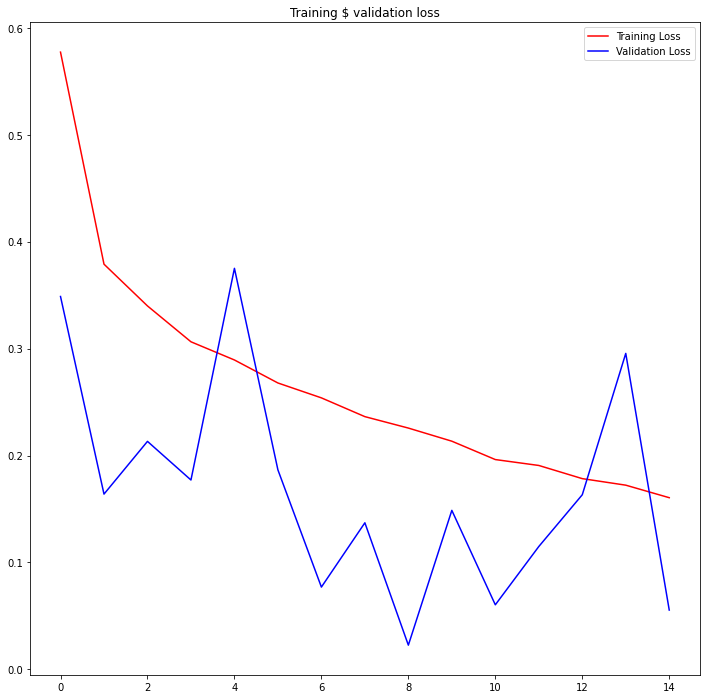

In [ ]:
print("Values for VGG-19 based ConvNet")
acc = history_vgg.history['accuracy']
val_acc = history_vgg.history['val_accuracy']
loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12,12))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training & validation accuracy')
plt.legend()

plt.figure(figsize = (12,12))

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training $ validation loss')
plt.legend()

plt.show()

# Models evaluated

In [55]:
model_vgg19.evaluate(test_generator)

InvalidArgumentError:  required broadcastable shapes
	 [[node sequential_4/p_re_lu_6/mul (defined at <ipython-input-47-b5b0bb942831>:1) ]] [Op:__inference_test_function_194101]

Function call stack:
test_function


# VGG19 model classification report

In [53]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = model_vgg19.predict_generator(test_generator, steps = test_steps_per_epoch)

predicted_classes = np.argmax(predictions, axis=1)

C:\Users\HSSL107\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


InvalidArgumentError:  required broadcastable shapes
	 [[node sequential_4/p_re_lu_6/mul (defined at <ipython-input-53-512b35a18b5d>:3) ]] [Op:__inference_predict_function_278162]

Function call stack:
predict_function


In [ ]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  

In [ ]:
report = sklearn.metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report) 

              precision    recall  f1-score   support

         CNV       0.25      0.27      0.26       242
         DME       0.25      0.23      0.24       242
      DRUSEN       0.24      0.24      0.24       242
      NORMAL       0.25      0.25      0.25       242

    accuracy                           0.25       968
   macro avg       0.25      0.25      0.25       968
weighted avg       0.25      0.25      0.25       968



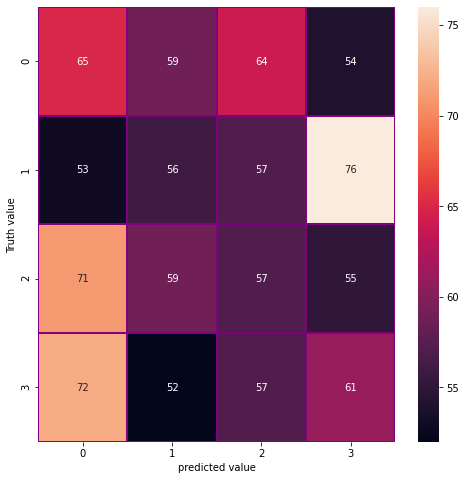

In [ ]:
cm = sklearn.metrics.confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8,8))
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='purple')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()

# Save model

In [46]:
from keras.models import load_model
model.save_weights("OCT_CUSTOM_weight.h5")

In [47]:
model.save("OCT_CUSTOM_model.h5")

In [13]:
model.load_weights('OCT_CUSTOM_weight.h5')

In [36]:
my_test_batch_generator = My_Custom_Generator(x_test, y_test, batch_size)
model.predict(my_test_batch_generator)

array([[0.00273088, 0.05609072, 0.02796206, 0.9132164 ],
       [0.16763218, 0.01881669, 0.7824277 , 0.03112338],
       [0.37270844, 0.16045532, 0.14575447, 0.32108176],
       ...,
       [0.7811857 , 0.01841142, 0.19922617, 0.0011767 ],
       [0.474837  , 0.05962021, 0.16359155, 0.30195126],
       [0.00159809, 0.03240253, 0.06269295, 0.90330637]], dtype=float32)

In [37]:
prediction = np.argmax(predict, axis=-1)
print(prediction.shape)
actual = np.argmax(y_test, axis=-1)
print(actual.shape)

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

accuracy = accuracy_score(prediction, actual)*100

NameError: name 'predict' is not defined

##  LIME

In [ ]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras.preprocessing.image import load_img, img_to_array
from skimage.segmentation import mark_boundaries
from matplotlib import pyplot as plt
import numpy as np 
import sklearn.cluster
#!pip install lime
from lime.lime_image import LimeImageExplainer

In [ ]:
from PIL import Image
import requests
url = 'https://scontent.fdac31-1.fna.fbcdn.net/v/t1.15752-9/233740400_370065494686665_5940624198620287757_n.jpg?_nc_cat=102&ccb=1-5&_nc_sid=ae9488&_nc_ohc=NXYtYhbHsOcAX8kyNzs&_nc_ht=scontent.fdac31-1.fna&oh=6ad46e253e6ced3b203d095dfe89c945&oe=613F346A'
image_cat = Image.open(requests.get(url, stream=True).raw)
image_cat = image_cat.resize((150,150))

In [ ]:
# Convert to numpy array, reshape and preprocess
image = img_to_array(image_cat)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
image[0].shape

(150, 150, 3)

In [ ]:
predictions = model_vgg.predict(image)

In [ ]:
#function of keras, allows to see the prob of each prediction
decode_predictions(predictions)

ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 4)

In [ ]:
# extract the index of the top 5 classes predicted by the model for the image selected 
model.predict(image).argsort()[0, -5:][::-1]

#keep the index of the first and the second class 
first_class = model.predict(image).argsort()[0, -5:][-1]
second_class = model.predict(image).argsort()[0, -5:][-2]

In [ ]:
explainer = LimeImageExplainer()
explanation = explainer.explain_instance(image[0], #the image
                                         model.predict, 
                                         top_labels=2, #want just to see the 2 main classes predicted
                                         num_samples=500, # number of observation sampled from the original distribution in order to computer the linear regression
                                         random_seed=42)

In [ ]:
# maps for the first class predicted
temp, mask = explanation.get_image_and_mask(first_class, positive_only=True, num_features=5, hide_rest=True)
# plot image and mask together
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
print('  Mask For Prediction of Class: ',decode_predictions(predictions)[0][0][1])
print("  Accracy : ",decode_predictions(predictions)[0][0][2])

In [ ]:
# maps for the second class predicted 
temp, mask = explanation.get_image_and_mask(second_class, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
print('  Mask For Prediction of Class: ', decode_predictions(predictions)[0][1][1])
print("  Accracy : ",decode_predictions(predictions)[0][1][2])

In [ ]:
# maps for the second class predicted 
temp, mask = explanation.get_image_and_mask(second_class, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
print('  Mask For Prediction of Class: ', decode_predictions(predictions)[0][2][1])
print("  Accracy : ",decode_predictions(predictions)[0][2][2])

In [ ]:
# maps for the second class predicted 
temp, mask = explanation.get_image_and_mask(second_class, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
print('  Mask For Prediction of Class: ', decode_predictions(predictions)[0][3][1])
print("  Accracy : ",decode_predictions(predictions)[0][3][2])

In [ ]:
# maps for the second class predicted 
temp, mask = explanation.get_image_and_mask(second_class, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
print('  Mask For Prediction of Class: ', decode_predictions(predictions)[0][4][1])
print("  Accracy : ",decode_predictions(predictions)[0][4][2])

In [16]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
    g.watch(x)
    y = x * x
dy_dx = g.gradient(y, x)
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)
